In [37]:
#Importing libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

In [38]:
#Helper function to set plot characteristics

def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=3);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[2].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[2].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[2].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    axes[2].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [39]:
# Reading the file into a dataframe
print("Using one point to perform regression is not enough, therefore the result of horizon line is underfitting (Simply pass the chosen data point).")
df = pd.read_csv("noisypopulation.csv")
df.head()

Using one point to perform regression is not enough, therefore the result of horizon line is underfitting (Simply pass the chosen data point).


,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [40]:
# Set the predictor and response variable
# Column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns

x = df.x
y = df.y
f = df.f

In [41]:
# Function to compute the Polynomial Features for the data x for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(d).fit_transform(x.reshape(-1,1))

In [42]:
### edTest(test_linear) ###
#Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    #Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept = False)
    
    #Fit the model to the data x and y
    lreg.fit(x, y)
    
    #Predict on the x_pred data
    y_pred = lreg.predict(x_pred)
    return y_pred

In [43]:
#Function to perform bootstrap and fit the data

# degree is the maximum degree of the model
# num_boot is the number of bootstraps
# size is the number of random points selected from the data for each bootstrap
# x is the predictor variable
# y is the response variable

def gen(degree, num_boot, size, x, y):
    
    predicted_values = []
    
    #Run the loop for the number of bootstrap value
    for i in range(num_boot):
        
        #Helper code to call the make_predict_with_model function to fit the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        #lreg and y_pred hold the model and predicted values of the current bootstrap
        y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        #Append the model and predicted values into the appropriate lists
        predicted_values.append(y_pred)

    
    return predicted_values

In [44]:
# Call the function gen twice with x and y as the predictor and response variable respectively
# The number of bootstraps should be 200 and the number of samples from the dataset should be 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1_1 = gen(1, 200, 2, x.to_numpy(), y.to_numpy());
predicted_1_2 = gen(1, 200, 39, x.to_numpy(), y.to_numpy());
predicted_1_3 = gen(1, 200, 100, x.to_numpy(), y.to_numpy());

# Get results for degree 3
predicted_3_1 = gen(3, 200, 2, x.to_numpy(), y.to_numpy());
predicted_3_2 = gen(3, 200, 39, x.to_numpy(), y.to_numpy());
predicted_3_3 = gen(3, 200, 100, x.to_numpy(), y.to_numpy());


# Get results for degree 100
predicted_100_1 = gen(100, 200, 2, x.to_numpy(), y.to_numpy());
predicted_100_2 = gen(100, 200, 39, x.to_numpy(), y.to_numpy());
predicted_100_3 = gen(100, 200, 100, x.to_numpy(), y.to_numpy());



<Figure size 864x576 with 0 Axes>

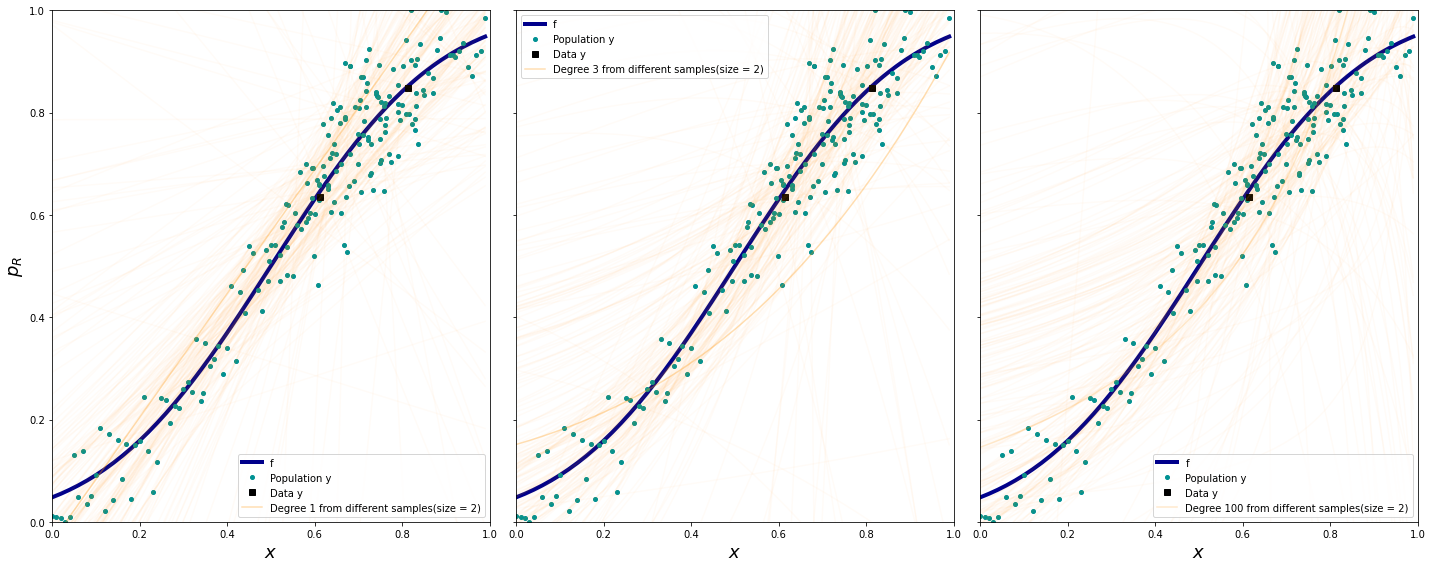

In [45]:
#Helper code to plot the data
#size = 2
indexes=np.sort(np.random.choice(x.shape[0], size=2, replace=False))
plt.figure(figsize = (12,8))
axes=make_plot()

#Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples(size = 2)")


#Plot for Degree 3
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_3_1[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x, predicted_3_1[-1], alpha=0.3,color='#FF9300',label="Degree 3 from different samples(size = 2)")



#Plot for Degree 100
axes[2].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[2].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[2].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100_1[:-1]):
    axes[2].plot(x,p,alpha=0.03,color='#FF9300')
axes[2].plot(x,predicted_100_1[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples(size = 2)")

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

#edgecolor='black', linewidth=3, facecolor='green',
plt.show()

<Figure size 864x576 with 0 Axes>

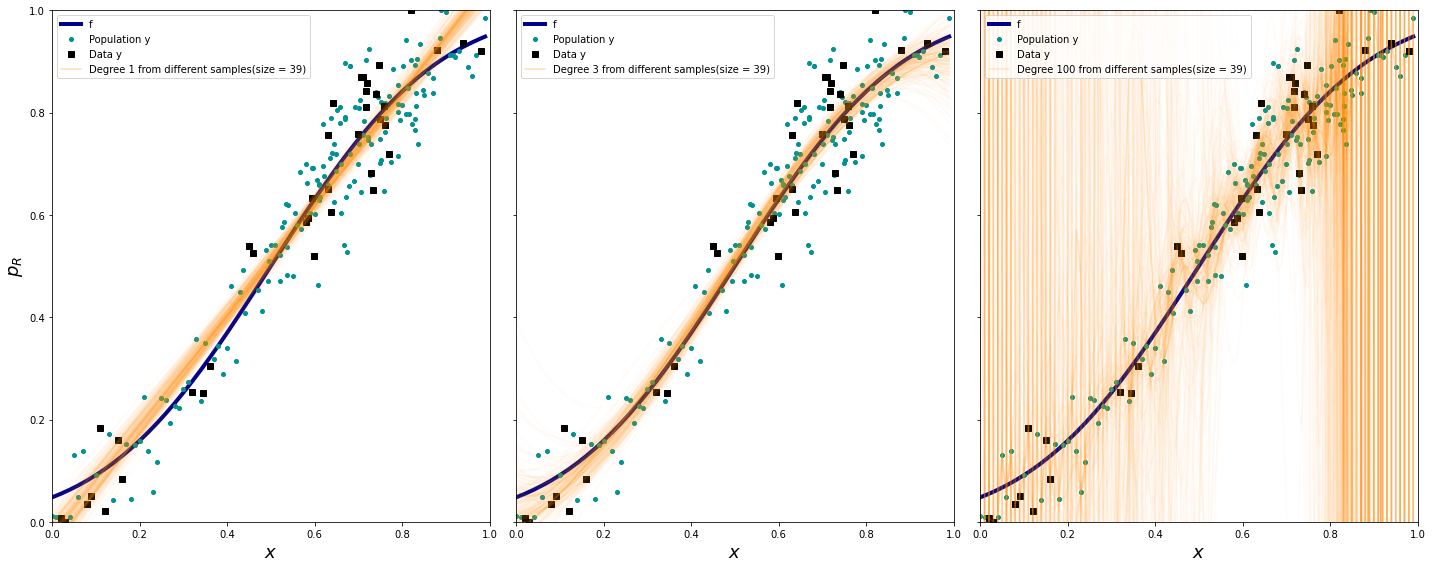

In [46]:
#Helper code to plot the data
#size = 39
indexes=np.sort(np.random.choice(x.shape[0], size=39, replace=False))
plt.figure(figsize = (12,8))
axes=make_plot()

#Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1_2[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1_2[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples(size = 39)")


#Plot for Degree 3
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_3_2[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x, predicted_3_2[-1], alpha=0.3,color='#FF9300',label="Degree 3 from different samples(size = 39)")



#Plot for Degree 100
axes[2].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[2].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[2].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100_2[:-1]):
    axes[2].plot(x,p,alpha=0.03,color='#FF9300')
axes[2].plot(x,predicted_100_2[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples(size = 39)")

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
#edgecolor='black', linewidth=3, facecolor='green',
plt.show()

<Figure size 864x576 with 0 Axes>

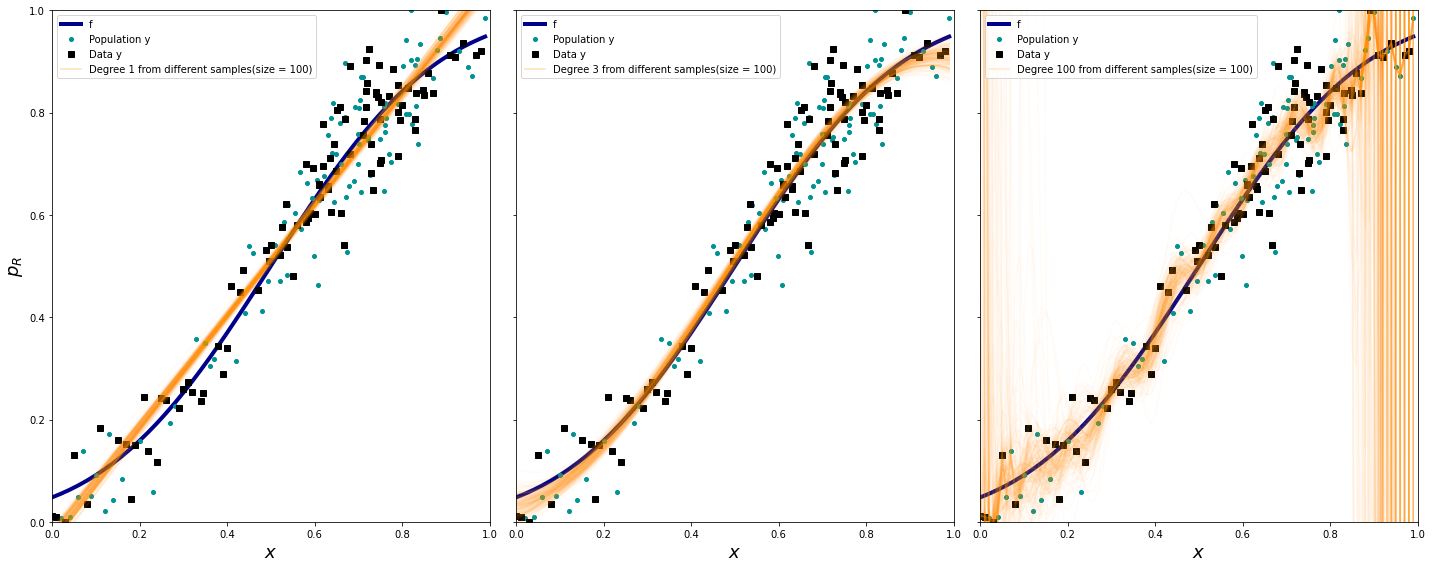

In [47]:
#Helper code to plot the data
#size = 100
indexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
plt.figure(figsize = (12,8))
axes=make_plot()

#Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1_3[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1_3[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples(size = 100)")


#Plot for Degree 3
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_3_3[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x, predicted_3_3[-1], alpha=0.3,color='#FF9300',label="Degree 3 from different samples(size = 100)")



#Plot for Degree 100
axes[2].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[2].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[2].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100_3[:-1]):
    axes[2].plot(x,p,alpha=0.03,color='#FF9300')
axes[2].plot(x,predicted_100_3[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples(size = 100)")

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

#edgecolor='black', linewidth=3, facecolor='green',
plt.show()

In [48]:
#Q2:
# Initialising required parameters

# The list of random states
ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]

# The list of alpha for regularization
alphas = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]

# The degree of the polynomial
degree= 30

In [49]:
# Read the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

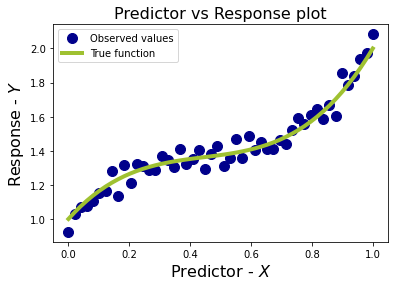

In [50]:
# Use the helper code below to visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x,y, 'o', label = 'Observed values',markersize=10 ,color = 'Darkblue')

# Plot x vs true function value
ax.plot(x,f, 'k-', label = 'True function',linewidth=4,color ='#9FC131FF')

ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [51]:
# Function to perform regularization with simple validation
def reg_with_validation(rs):
    
    # Split the data into train and validation sets with train size as 80% and random_state as
    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8, random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train.reshape(-1,1))
    x_poly_val= PolynomialFeatures(degree).fit_transform(x_val.reshape(-1,1))

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha and with fit_intercept=False
        ridge_reg = Ridge(alpha = alpha, fit_intercept=False)
        
        # Fit on the modified training data
        ridge_reg.fit(x_poly_train, y_train)

        # Predict on the training set 
        y_train_pred = ridge_reg.predict(x_poly_train)
        
        # Predict on the validation set 
        y_val_pred = ridge_reg.predict(x_poly_val)
        
        # Compute the training and validation mean squared errors
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_val, y_val_pred)

        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error

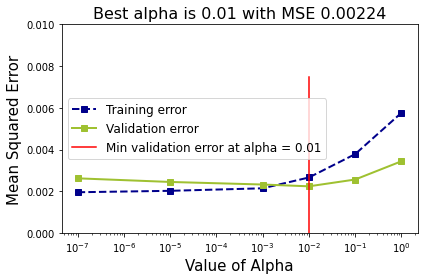

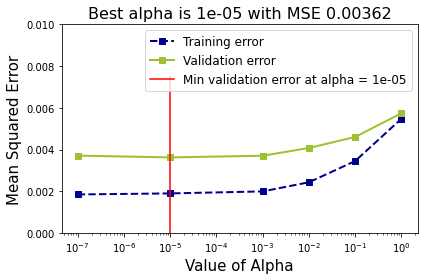

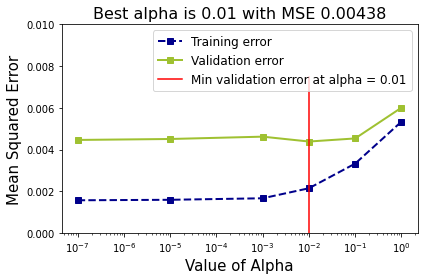

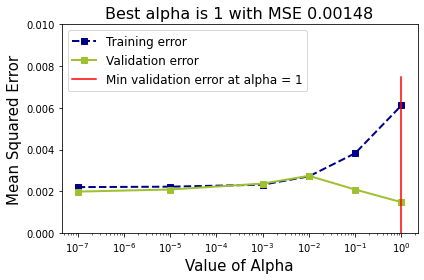

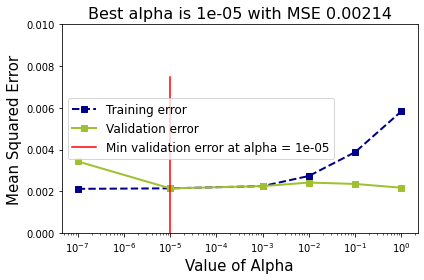

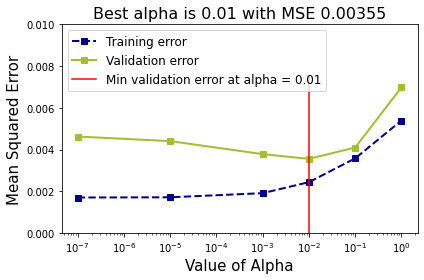

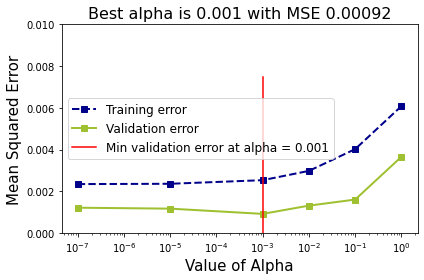

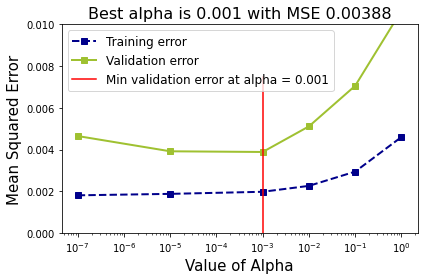

In [52]:
### edTest(test_validation) ###
# Initialise a list to store the best alpha using simple validation for varying random states
best_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):

    # Get the train and validation error by calling the function reg_with_validation
    training_error, validation_error = reg_with_validation(ran_state[i])

    # Get the best mse from the validation_error list
    best_mse = np.min(np.abs(validation_error))
    
    # Get the best alpha value based on the best mse
    best_parameter = alphas[np.argsort(np.abs(validation_error))[0]]
    
    # Append the best alpha to the list
    best_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()

In [53]:
# Function to perform regularization with cross validation
def reg_with_cross_validation(rs):
    
    # Sample your data to get different splits using the random state
    df_new = df.sample(frac = 1, random_state = rs)
    
    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    x = df_new[['x']].values

    # Assign the values of the 'y' column as the response from your sampled dataframe
    y = df_new['y'].values

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features on the entire data
    x_poly = PolynomialFeatures(degree).fit_transform(x.reshape(-1,1))

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha value and with fit_intercept=False
        ridge_reg = Ridge(alpha = alpha, fit_intercept=False)
        
        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Remember to get the train_score
        ridge_cv = cross_validate(ridge_reg, x_poly, y, cv = 5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

        # Compute the training and validation errors got after cross validation
        mse_train = np.mean(np.abs(ridge_cv['train_neg_mean_squared_error']))
        mse_val = np.mean(np.abs(ridge_cv['test_neg_mean_squared_error']))
        
        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error

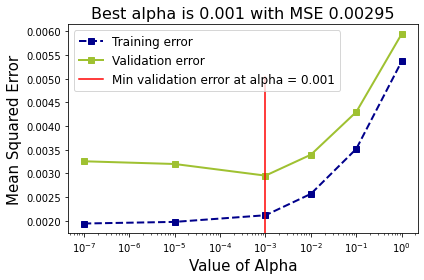

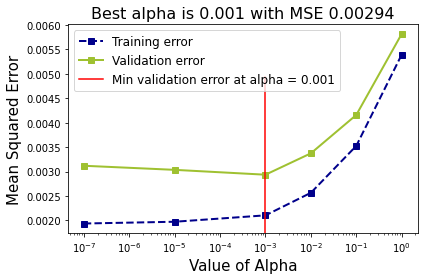

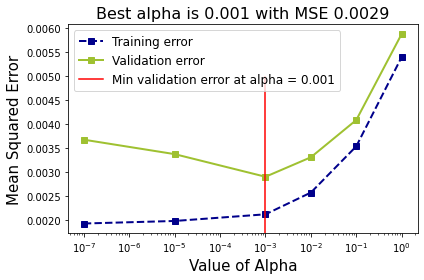

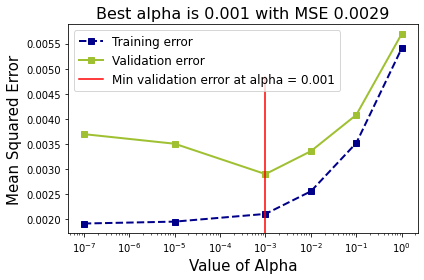

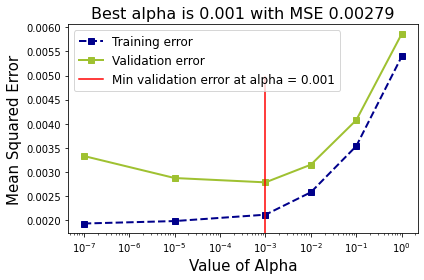

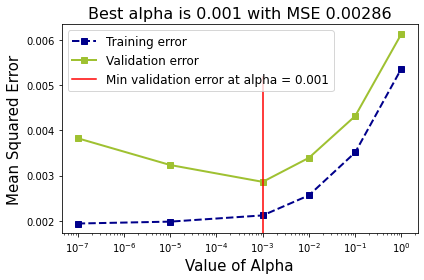

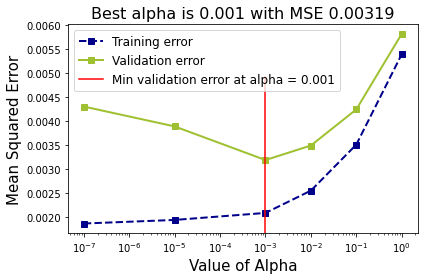

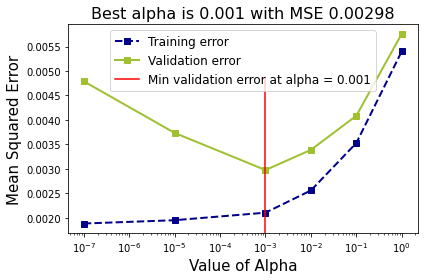

In [54]:
# Initialise a list to store the best alpha using cross validation for varying random states
best_cv_alpha = []

# Run a loop for different random_states
for i in range(len(ran_state)):
    
    # Get the train and validation error by calling the function reg_with_cross_validation
    training_error, validation_error = reg_with_cross_validation(ran_state[i])

    # Get the best mse from the validation_error list
    best_mse  = np.min(validation_error)
    
    # Get the best alpha value based on the best mse
    best_parameter = alphas[np.argsort(validation_error)[0]]
    
    # Append the best alpha to the list
    best_cv_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()